In [1]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [10]:
df_oob = pd.read_csv("./results/oob/mm_oob_avg.csv")
df_opt = pd.read_csv("./results/opt/mm_1.0.csv")
pd.options.display.max_rows = 999
confs = list(df_oob['conf'].values)
unq_m = df_oob['m'].unique()
n_confs = int(df_oob.shape[0] / len(unq_m))
df_oob

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,inference_avg,iters
0,f16_m2,256,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,255.281120,221.675821,331.222368,356.100131,415.013526,287.795546,328.677476,100.0
1,f16_m2,512,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,434.234238,246.689403,714.687341,484.143101,327.426638,325.498517,343.824680,100.0
2,f16_m2,1024,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,516.316762,240.494166,1018.278918,967.627593,402.899294,352.229950,498.797122,100.0
3,f16_m2,2048,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,406.473084,220.759249,3576.624308,3475.651982,715.504918,698.075665,1176.135352,100.0
4,f16_m2,3072,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,572.661895,415.502944,7966.997297,7708.303608,1662.727074,1511.263648,2542.322417,100.0
5,f16_m2,4096,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,615.406220,410.598127,13903.590998,13678.708079,2306.892868,2205.898490,4783.753749,100.0


In [9]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [11]:
df_opt = df_opt.loc[df_opt['conf'].isin(df_oob['conf'].unique()) & df_opt['m'].isin(df_oob['m'].unique())]
df_opt

,conf,m,k,n,use_trace,grid_size,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inference_time_avg,trace_time,transfer_time_in0,transfer_time_in1,TFLOPs (avg),Utilization (vs user grid),Utilization (vs 8x8 full grid)
0,f16_m2,256,256,256,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,257.33,0.0,8198.98,6401.78,0.13,0.10%,0.07%
1,f16_m2,512,512,512,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,244.19,0.0,31430.72,28049.47,1.10,0.84%,0.61%
2,f16_m2,1024,1024,1024,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,243.73,0.0,96463.44,94807.15,8.81,6.72%,4.89%
3,f16_m2,2048,2048,2048,False,"(8, 8)",True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,399.80,0.0,397473.81,377968.07,42.97,32.78%,23.84%
4,f16_m2,3072,3072,3072,False,"(8, 8)",False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1990.74,0.0,855528.12,844532.97,29.13,22.22%,16.16%
5,f16_m2,4096,4096,4096,False,"(8, 8)",False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,4383.52,0.0,1518186.57,1515043.02,31.35,23.92%,17.40%


In [12]:
df_oob_inf = get_column_df_info(df_oob, 'inference_avg')
df_opt_inf = get_column_df_info(df_opt, 'inference_time_avg')
df_opt_inf.columns = [str(c + "_opt") for c in df_opt_inf.columns]
df_inf = pd.concat([df_oob_inf, df_opt_inf], axis=1)
df_inf

,f16_m2,f16_m2_opt
256,328.677476,257.33
512,343.824680,244.19
1024,498.797122,243.73
2048,1176.135352,399.80
3072,2542.322417,1990.74
4096,4783.753749,4383.52


## Inference

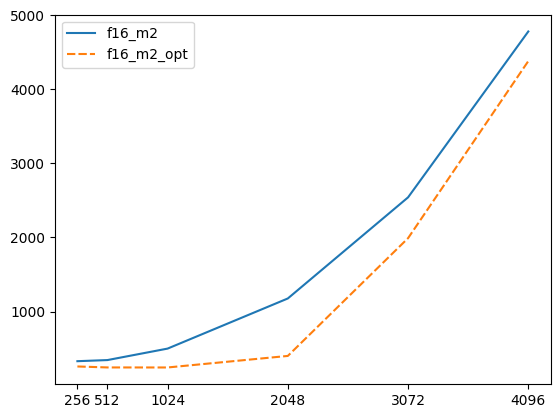

In [13]:
plot = sns.lineplot(df_inf)
plot.set_xticks(df_inf.index)
plt.show()